# template for getting data for aquire.py

In [1]:
# getting data for acquire.py

import pandas as pd
import numpy as np
import os
from env import host, user, password

def get_connection(db, user=user, host=host, password=password):
    '''
    This function gets my info from my env file and creats a connection url 
    
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
def telco_churn_data():
    
    sql_query = '''SELECT * FROM customers
    JOIN internet_service_types USING(internet_service_type_id)
    JOIN contract_types USING(contract_type_id)
    JOIN payment_types USING(payment_type_id)'''
    
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df 

def get_telco_churn_data():
    
    if os.path.isfile('telco_churn.csv'):
        
        df = pd.read_csv('telco_churn.csv', index_col=0)
    
    else:
        
        df = telco_churn_data()
        df.to_csv('telco_churn.csv')
    
    return df

In [2]:
df = get_telco_churn_data()
df.head() #check_yo_head

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [3]:
df[df['total_charges'].str.contains(" ")] # looking at the empty (" ") values in total_charges

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
3977,2,2,3,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,None,One year,Mailed check
5512,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,None,Two year,Mailed check
5548,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,None,Two year,Mailed check
5558,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,None,Two year,Mailed check
5629,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,None,Two year,Mailed check
5838,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,None,Two year,Mailed check
6500,4,3,1,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,DSL,Two year,Credit card (automatic)
6571,3,3,1,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,DSL,Two year,Bank transfer (automatic)
6651,2,3,1,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,DSL,Two year,Mailed check
6670,3,3,1,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,DSL,Two year,Bank transfer (automatic)


In [4]:
telco_db = df

In [7]:
# df = df.drop(df.total_charges.str.contains(" ").index, inplace = True)
new_telco = telco_db.drop(telco_db[telco_db['total_charges'].str.contains(" ")].index, inplace = True)

In [8]:
new_telco.head()

AttributeError: 'NoneType' object has no attribute 'head'

# template for prepare.py 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from env import host, user, password
from acquire import get_connection, telco_churn_data, get_telco_churn_data

# prepare telco data

def num_distributions(df):
    '''
    This functions takes in a dataframe and displays
    the distribution of each numeric column.
    '''
    for col in df.columns:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.show()

def prepare_telco_churn(df):
    '''cleans our telco churn data for us, and makes dummies'''
    #df.replace('', np.nan, regex = True)
    #is.na.sum()
    #total_charges had 11 null values. I changed them into a float, and filled nulls with the mean of all total charges.
    df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
    df.total_charges = df.total_charges.fillna(value=df.total_charges.mean()).astype('float64')
    df.replace('No internet service', 'No', inplace=True)
    df.replace('No phone service', 'No', inplace = True)
            
            

###################### Prepare telco Data With Split ######################


def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on species.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on species to get an even mix of each species
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
    
    # splits train_validate into train and validate using train_test_split() stratifying on species to get an even mix of each species
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test            

In [14]:
prep_df = prepare_telco_churn(df)

In [18]:
prep_df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [16]:
# df = telco_db.drop(telco_db[telco_db['total_charges'].str.contains(" ")].index, inplace = True)

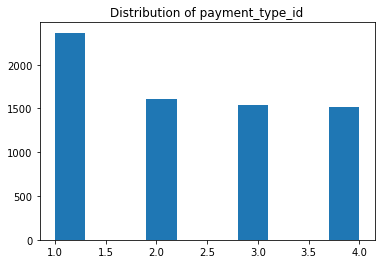

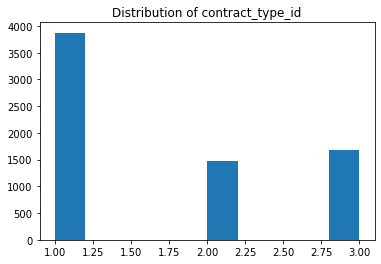

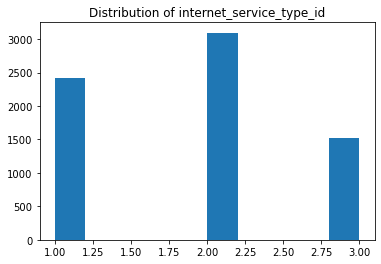

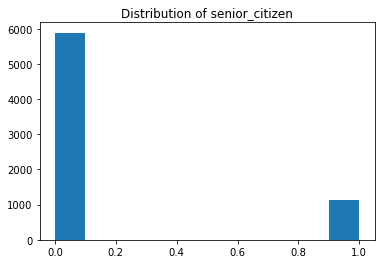

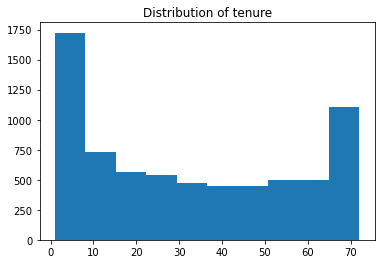

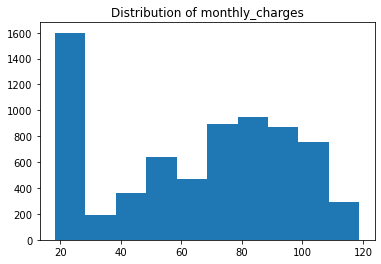

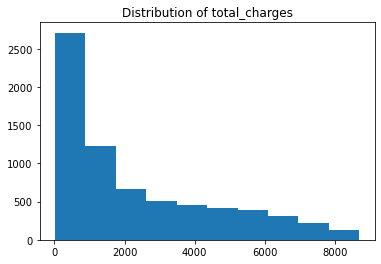

In [12]:
num_distributions(df)

## Create the Predictions CSV

- Create a CSV file with probability of class, prediction of churn (1=churn, 0=not_churn)

- These predictions should be from your best performing model that you ran on X_test. Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

### proba_test = dt_model.predict_proba(X_test)